###  Introduciton

This project investigates the factors influencing sound quality in earphones. The research emphasizes the significant impact of Balanced Armature (BA) units on audio performance, with an increase in the number of BA units generally leading to better sound quality. However, this relationship does not hold true for other driver types such as Dynamic Driver (DD), Electrostatic (EST), or Planar drivers. A predictive model is developed to estimate the ranking of different earphone setups, providing valuable insights for consumers and manufacturers. The analysis also reveals the market landscape, with Campfire Audio having the highest number of products, followed by Final Audio, Moondrop, and Empire Ears. Different sound signatures, such as V-shaped, Warm, and Neutral, are prevalent among earphones, catering to diverse consumer preferences. Interestingly, the study finds no strong correlation between headphone price and sound quality ranking, highlighting the importance of considering other factors. Overall, this research enhances our understanding of earphone sound quality and offers valuable guidance for consumers and manufacturers in the selection and development of high-quality earphones.

### Require Tools

1. Selenium: Selenium is a web automation library that allows you to control web browsers and automate browser-based tasks.
2. Pandas: Pandas is a data manipulation and analysis library that provides easy-to-use data structures and data analysis tools for handling structured data.
3. NumPy: NumPy is a powerful library for numerical computing in Python, providing support for large, multi-dimensional arrays and a collection of mathematical functions to operate on these arrays efficiently.
4. Matplotlib: Matplotlib is a comprehensive plotting library for creating static, animated, and interactive visualizations in Python.
5. Seaborn: Seaborn is a statistical data visualization library built on top of Matplotlib, providing a high-level interface for creating attractive and informative statistical graphics.
6. re: The re module is a built-in library in Python for working with regular expressions, allowing you to search, match, and manipulate text patterns in strings.
7. Scikit-learn: Scikit-learn is a machine learning library that offers a wide range of supervised and unsupervised learning algorithms, along with tools for data preprocessing, model evaluation, and performance metrics.

In [358]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import re
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# 1. Data Collection

### Data Soure

Here we are scraping data from a HIFI website "[In-Ear Fidelity](https://crinacle.com)".
In-Ear Fidelity is a website dedicated to headphone reviews and audio devices. The website was created by renowned audio critic Crinacle, who is known for his thorough and objective reviews.The evaluation methodology of In-Ear Fidelity is based on objectivity and scientific principles. They utilize professional measuring equipment and standardized testing procedures to obtain accurate audio data. This data helps consumers understand key metrics such as frequency response, distortion, and soundstage performance, enabling them to make more informed purchasing decisions.

![image.png](Images/WebLogo.png)

## 1.1 Scrap Data

Crawling the headphone ranking data of the website, and save as data.csv file

In [ ]:
def open_driver(url):
    options = webdriver.ChromeOptions()
    options.add_experimental_option('excludeSwitches', ['enable-logging'])  # for ignore warning and error (log information)

    #use follow this option for headless modle
    # options.add_argument("--headless")
    # options.add_argument("--window-size=1280,800")

    driver = webdriver.Chrome(options=options,executable_path='./chromedriver')
    driver.get(url)
    driver.implicitly_wait(0.5)  # set a waiting time limit for the browser driver
    driver.maximize_window()
    return driver

For this project, we use the Selenium to scrap the data from the Website of the ranking by In-Ear Fidelity (https://crinacle.com/rankings/iems/).


In [19]:
url = "https://crinacle.com/rankings/iems/"
driver = open_driver(url)
wait = WebDriverWait(driver, 5)

# scroll the page down
firstwindows = wait.until(EC.visibility_of_element_located((By.XPATH,"/html/body/div[2]/section[2]/div/div[1]/div/div[4]/div/div/article/div/a/div")))
driver.execute_script("arguments[0].scrollIntoView();", firstwindows)

# get all the information from the ranking table
ranking_table = wait.until(EC.visibility_of_element_located((By.XPATH,"/html/body/div[2]/section[3]/div/div[1]/div/div/div/div/div/div[3]")))
rank_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-1")
value_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-2")
name_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-3")
price_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-4")
signature_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-5")
comments_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-6")
ToneGrade_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-7")
TechnicalGrade_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-8")
Setup_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-9")
Status_elements = ranking_table.find_elements(By.CSS_SELECTOR, ".column-10")

# put data into a Dataframe
data = pd.DataFrame()
data["Rank"] = [rank.text for rank in rank_elements]
data["Value"] = [value.text for value in value_elements]
data["Name"] = [name.text for name in name_elements]
data["Price"] = [price.text for price in price_elements]
data["Signature"] = [signature.text for signature in signature_elements]
data["Comments"] = [comments.text for comments in comments_elements]
data["Tone Grade"] = [tone_grade.text for tone_grade in ToneGrade_elements]
data["Technical Grade"] = [technical_grade.text for technical_grade in TechnicalGrade_elements]
data["Setup"] = [setup.text for setup in Setup_elements]
data["Status"] = [status.text for status in Status_elements]
data = data.drop([0,data.index[-1]])

# save the data
data.to_csv("data.csv")

## 1.2 Data overview

In [128]:
data

,Rank,Brand,Name,Price,Signature,Comments,Tone Grade,Technical Grade,Setup,Status,DD,BA,EST,Planar
1,16,NaN,Elysian Annihilator (2021),NaN,U-shaped,NaN,16,17,2EST 4BA 1DD,Zeppelin & Co demo unit,1,4,2,0
2,16,Hidition,"Hidition Viento\n(B-mode, custom)",NaN,Variable,Best-in-class tuning and tonal balance with ne...,18,15,4BA,Zeppelin & Co demo unit,0,4,0,0
3,16,ThieAudio,ThieAudio Monarch Mk2,NaN,Neutral with bass boost,NaN,18,15,2EST 6BA 1DD,Available for demo at The Hangout,1,6,2,0
4,15,Hidition,Hidition NT6,NaN,Neutral,"If Etymotic made a multi-BA IEM, this would be...",16,15,6BA,Null Audio demo unit,0,6,0,0
5,15,ThieAudio,ThieAudio V16 Divinity,NaN,Neutral with bass boost,NaN,16,15,16BA,Available for demo at The Hangout,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3,NaN,VE Monk IE Smalls,NaN,Dark,Sounds exactly like what would happen if you s...,3,3,DD,Third party unit,1,0,0,0
1067,2,NaN,VE Monk IE Biggie,NaN,Dark,Absolute mud and congestion. Could work as a s...,2,3,DD,Third party unit,1,0,0,0
1068,2,NaN,Oppo MH130,"(0.0, 100.0]",Complete failure,The horribleness of this can only be experienc...,2,2,DD,Third party unit,1,0,0,0
1069,2,NaN,Delta Air complimentary earphones,NaN,Complete failure,It's a telephone in IEM form. It is physically...,2,2,DD,Third party unit,1,0,0,0


# 2. Data Preproccess

### Read the data
In oder not to scrap the data every times, read the data from data.csv before use the data.

In [367]:
data = pd.read_csv('data.csv')

## 2.1 Data cleanning

Some data what should be a number but not a number now. --------- pd.to_numeric()  

Some properties is useless.---------- data.drop()

In [368]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data.drop(index=data.index[0], columns=data.columns[0])
data = data.drop('Value', axis=1)

data

,Rank,Name,Price,Signature,Comments,Tone Grade,Technical Grade,Setup,Status
1,S-,Elysian Annihilator (2021),3700.0,U-shaped,NaN,S-,S,2EST 4BA 1DD,Zeppelin & Co demo unit
2,S-,"Hidition Viento\n(B-mode, custom)",950.0,Variable,Best-in-class tuning and tonal balance with ne...,S+,A+,4BA,Zeppelin & Co demo unit
3,S-,ThieAudio Monarch Mk2,1000.0,Neutral with bass boost,NaN,S+,A+,2EST 6BA 1DD,Available for demo at The Hangout
4,A+,Hidition NT6,1050.0,Neutral,"If Etymotic made a multi-BA IEM, this would be...",S-,A+,6BA,Null Audio demo unit
5,A+,ThieAudio V16 Divinity,1500.0,Neutral with bass boost,NaN,S-,A+,16BA,Available for demo at The Hangout
...,...,...,...,...,...,...,...,...,...
1066,E,VE Monk IE Smalls,NaN,Dark,Sounds exactly like what would happen if you s...,E,E,DD,Third party unit
1067,F,VE Monk IE Biggie,NaN,Dark,Absolute mud and congestion. Could work as a s...,F,E,DD,Third party unit
1068,F,Oppo MH130,14.0,Complete failure,The horribleness of this can only be experienc...,F,F,DD,Third party unit
1069,F,Delta Air complimentary earphones,0.0,Complete failure,It's a telephone in IEM form. It is physically...,F,F,DD,Third party unit


## 2.2 Numeralization

Because of the properties of "Rank" , "Tone Grade" and "Setup" is express by letters "S" to "F", we need to transfer the leeter to numbers to analyse.

In [369]:
# numeralization the Letter of Rank Value 
letter_to_value = {
    'S+': 18,
    'S': 17,
    'S-': 16,
    'A+': 15,
    'A': 14,
    'A-': 13,
    'B+': 12,
    'B': 11,
    'B-': 10,
    'C+': 9,
    'C': 8,
    'C-': 7,
    'D+': 6,
    'D': 5,
    'D-': 4,
    'E': 3,
    'F': 2,
}
data["Rank"] = data["Rank"].replace(letter_to_value)
data["Tone Grade"] = data["Tone Grade"].replace(letter_to_value)
data["Technical Grade"] = data["Technical Grade"].replace(letter_to_value)

data

,Rank,Name,Price,Signature,Comments,Tone Grade,Technical Grade,Setup,Status
1,16,Elysian Annihilator (2021),3700.0,U-shaped,NaN,16,17,2EST 4BA 1DD,Zeppelin & Co demo unit
2,16,"Hidition Viento\n(B-mode, custom)",950.0,Variable,Best-in-class tuning and tonal balance with ne...,18,15,4BA,Zeppelin & Co demo unit
3,16,ThieAudio Monarch Mk2,1000.0,Neutral with bass boost,NaN,18,15,2EST 6BA 1DD,Available for demo at The Hangout
4,15,Hidition NT6,1050.0,Neutral,"If Etymotic made a multi-BA IEM, this would be...",16,15,6BA,Null Audio demo unit
5,15,ThieAudio V16 Divinity,1500.0,Neutral with bass boost,NaN,16,15,16BA,Available for demo at The Hangout
...,...,...,...,...,...,...,...,...,...
1066,3,VE Monk IE Smalls,NaN,Dark,Sounds exactly like what would happen if you s...,3,3,DD,Third party unit
1067,2,VE Monk IE Biggie,NaN,Dark,Absolute mud and congestion. Could work as a s...,2,3,DD,Third party unit
1068,2,Oppo MH130,14.0,Complete failure,The horribleness of this can only be experienc...,2,2,DD,Third party unit
1069,2,Delta Air complimentary earphones,0.0,Complete failure,It's a telephone in IEM form. It is physically...,2,2,DD,Third party unit


## 2.3 Data Extraction


### From Name extrace the brand

In oder to analyse the brand of the data ,we cand extracte the brand from the item's name.

For this project we chose 27 hot brands to classify.


In [370]:
data.insert(1, "Brand", np.nan)

brand_names = ['Sony', 'Moondrop','Sennheiser','qdc','Softears','Oriolus','ThieAudio','64 Audio','Empire Ears','Vision Ears','DUNU','7Hz','JVC',
                  'Hidition','Shure','HYLA','AKG','Acoustune','Noble','Final Audio','TFZ','Campfire','Hifiman','FitEar','VSonic','B&O','Westone']

for brand in brand_names:
    #data.loc( ): the input value is a Boolean index that selects specific rows and columns
    data.loc[data["Name"].str.contains(brand, case=False, na=False), "Brand"] = brand
    
data

,Rank,Brand,Name,Price,Signature,Comments,Tone Grade,Technical Grade,Setup,Status
1,16,NaN,Elysian Annihilator (2021),3700.0,U-shaped,NaN,16,17,2EST 4BA 1DD,Zeppelin & Co demo unit
2,16,Hidition,"Hidition Viento\n(B-mode, custom)",950.0,Variable,Best-in-class tuning and tonal balance with ne...,18,15,4BA,Zeppelin & Co demo unit
3,16,ThieAudio,ThieAudio Monarch Mk2,1000.0,Neutral with bass boost,NaN,18,15,2EST 6BA 1DD,Available for demo at The Hangout
4,15,Hidition,Hidition NT6,1050.0,Neutral,"If Etymotic made a multi-BA IEM, this would be...",16,15,6BA,Null Audio demo unit
5,15,ThieAudio,ThieAudio V16 Divinity,1500.0,Neutral with bass boost,NaN,16,15,16BA,Available for demo at The Hangout
...,...,...,...,...,...,...,...,...,...,...
1066,3,NaN,VE Monk IE Smalls,NaN,Dark,Sounds exactly like what would happen if you s...,3,3,DD,Third party unit
1067,2,NaN,VE Monk IE Biggie,NaN,Dark,Absolute mud and congestion. Could work as a s...,2,3,DD,Third party unit
1068,2,NaN,Oppo MH130,14.0,Complete failure,The horribleness of this can only be experienc...,2,2,DD,Third party unit
1069,2,NaN,Delta Air complimentary earphones,0.0,Complete failure,It's a telephone in IEM form. It is physically...,2,2,DD,Third party unit


### Vectorize the setup

The setup of the earphones is a string like "2EST 4BA 1DD", "2BA" etc.   

In oder to anaylse the setup, We need to vectorize this parameter like "2EST 4BA 1DD" = [2,4,1,0],"2BA" = [0,2,0,0]

In [371]:
dd_counts = []
ba_counts = []  
est_counts = []
planar_counts = []
data['Setup'] = data['Setup'].astype(str)

def convert_list_to_int(lst):
    if lst == []: 
        return 0
    else:
        numbers = [int(item) for item in lst if re.match(r'^-?\d+(\.\d+)?$', item)]
        if numbers == []:
            return 1
        else:
            return int(numbers[0])
    
for row in data['Setup']:
    dd_count = convert_list_to_int(re.findall(r'(\d+)\s*DD|DD', row))
    ba_count = convert_list_to_int(re.findall(r'(\d+)\s*BA|BA', row))
    est_count = convert_list_to_int(re.findall(r'(\d+)\s*EST|EST|Electrostatic', row))
    planar_count = convert_list_to_int(re.findall(r'(\d+)\s*Planar|Planar', row))

    dd_counts.append(dd_count)
    ba_counts.append(ba_count)
    est_counts.append(est_count)
    planar_counts.append(planar_count)

data['DD'] = dd_counts
data["BA"] = ba_counts
data['EST'] = est_counts
data['Planar'] = planar_counts

data


,Rank,Brand,Name,Price,Signature,Comments,Tone Grade,Technical Grade,Setup,Status,DD,BA,EST,Planar
1,16,NaN,Elysian Annihilator (2021),3700.0,U-shaped,NaN,16,17,2EST 4BA 1DD,Zeppelin & Co demo unit,1,4,2,0
2,16,Hidition,"Hidition Viento\n(B-mode, custom)",950.0,Variable,Best-in-class tuning and tonal balance with ne...,18,15,4BA,Zeppelin & Co demo unit,0,4,0,0
3,16,ThieAudio,ThieAudio Monarch Mk2,1000.0,Neutral with bass boost,NaN,18,15,2EST 6BA 1DD,Available for demo at The Hangout,1,6,2,0
4,15,Hidition,Hidition NT6,1050.0,Neutral,"If Etymotic made a multi-BA IEM, this would be...",16,15,6BA,Null Audio demo unit,0,6,0,0
5,15,ThieAudio,ThieAudio V16 Divinity,1500.0,Neutral with bass boost,NaN,16,15,16BA,Available for demo at The Hangout,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3,NaN,VE Monk IE Smalls,NaN,Dark,Sounds exactly like what would happen if you s...,3,3,DD,Third party unit,1,0,0,0
1067,2,NaN,VE Monk IE Biggie,NaN,Dark,Absolute mud and congestion. Could work as a s...,2,3,DD,Third party unit,1,0,0,0
1068,2,NaN,Oppo MH130,14.0,Complete failure,The horribleness of this can only be experienc...,2,2,DD,Third party unit,1,0,0,0
1069,2,NaN,Delta Air complimentary earphones,0.0,Complete failure,It's a telephone in IEM form. It is physically...,2,2,DD,Third party unit,1,0,0,0


# 3. Data Analysis

## 3.1 Price 

### Price Distribution

To analyze the distribution of earphones prices, it can use the Seaborn libaray.  

/var/folders/12/1wxvcl7j6z7b51md_srtj0_m0000gn/T/ipykernel_25407/3353855118.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Price',bins = 30, data=data, palette=palette,kde = True)


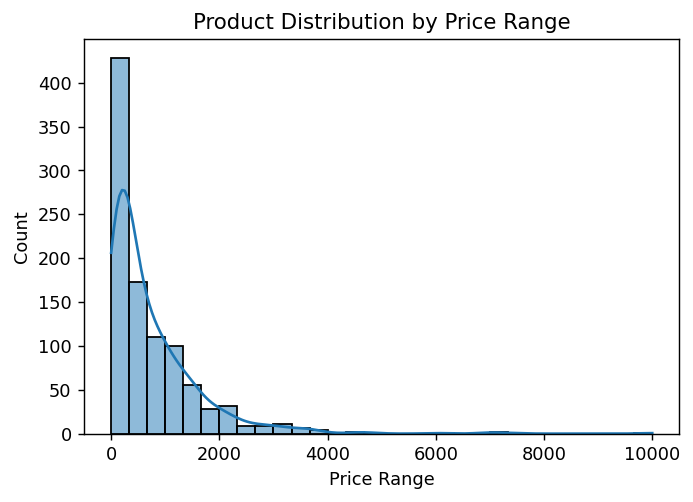

In [372]:
plt.figure(figsize=(6,4),dpi=128)
palette=sns.color_palette(desat=1, n_colors=55)
sns.histplot(x='Price',bins = 30, data=data, palette=palette,kde = True)


plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Product Distribution by Price Range')
plt.show()

We can find that the price of headphones is mainly distributed in the range of 2000 yuan, which is the main consumer group.

### correlation between Price and Rank

Are more expensive headphones always better? To get the answer, we can use the jointplot to anaylse the correlation between Price and Rank

<Figure size 100x100 with 0 Axes>

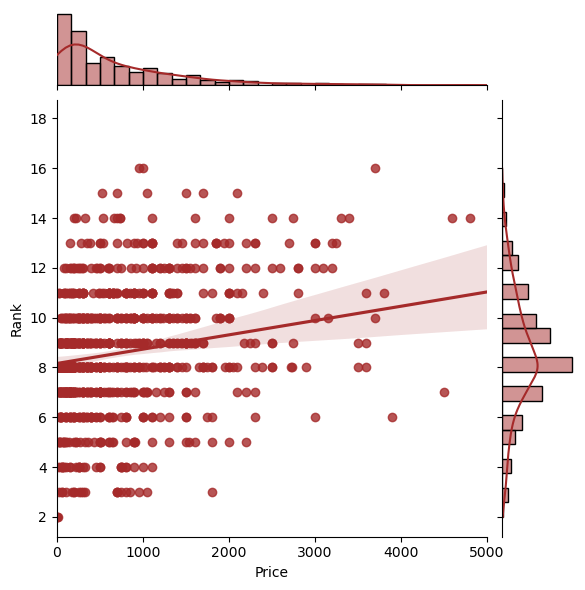

In [373]:
plt.figure(figsize=(1, 1))
sns.jointplot(x='Price', y='Rank',data=data, kind='reg',color = 'brown',xlim=(0, 5000))

plt.xlabel('Price')
plt.ylabel('Rank')
plt.show()

We can see that the correlation between the price of headphones and the ranking of headphones is not particularly strong, and the more expensive headphones do not mean better listening.

## 3.2 Signature

### What is signature?
If you have an audiophile friend or have watched any headphone reviews on YouTube, you must have noticed how they tend to use words such as "flat," "smooth," or "bright." All of these terms are sound signatures.

Here are some command signature about earphones:
1. Neutral
   A netral or Flat sound signature is when all the frequencies are set at the same value, i.e., there is no elevation or reduction of any particular frequency response. It means the lows (20-250 Hz), the mids (250-2 kHz), and the highs (2 kHz-20 kHz) are all equally tuned
   
   <img src="Images/Flat.png" alt="Flat Signature" width="400">
2. V-Shaped
   In the V-shaped sound signature, the lows and the highs are elevated, while the mids are reduced. This signature is the most colorful out of all and, hence, is the most fun listening experience. Most manufacturers opt for this signature in their headphones because it is the safest bet.

   <img src="Images/V-shape.png" alt="V-Shaped Signature" width="400">
3. Warm
   The warm or smooth sound signature is the diluted version of the dark signature. This is to say that it emphasizes lows and mids, but only slightly—making sure that higher frequencies are not overpowered, resulting in what audiophiles usually call a relaxed listening experience. In other words, you can listen to your tracks for long periods without any fatigue.

   <img src="Images/Warm.png" alt="Warm Signature" width="400">


### Percent of Signature

The "Signature" of a headset usually refers to the sound signature or audio performance of the earphones.Such as V-shaped,Warm,Neutral and so on.

The pie chart can be used to analyze the proportion of different "Signature" of headphones.

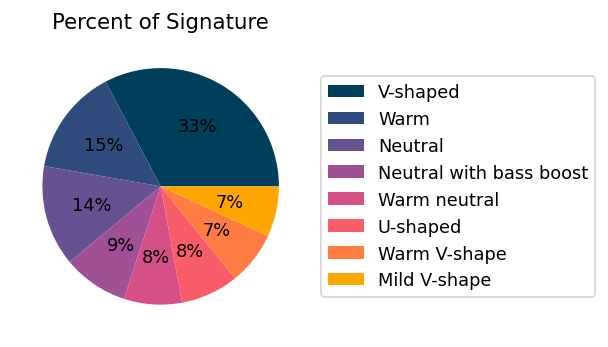

In [380]:
column_counts = data['Signature'].value_counts()
labels = column_counts.head(8).index.tolist()
sizes = data.Signature.value_counts().head(8)
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

plt.figure(figsize=(6, 3),dpi=128)
plt.pie(sizes,autopct='%1.0f%%',colors=colors) 
plt.title('Percent of Signature')
plt.legend(labels,loc='right',bbox_to_anchor=(2, 0.5))
plt.show()

We can find that V-shape headphones account for 33% of the total, which is the largest number, followed by Warm and Neutal, which account for about 15%

## 3.3 Brand 

### The number of earphones of different brands

The mainstream hifi headphones have sorted out 27 brands, and analyzed the number distribution of different brands in this data.

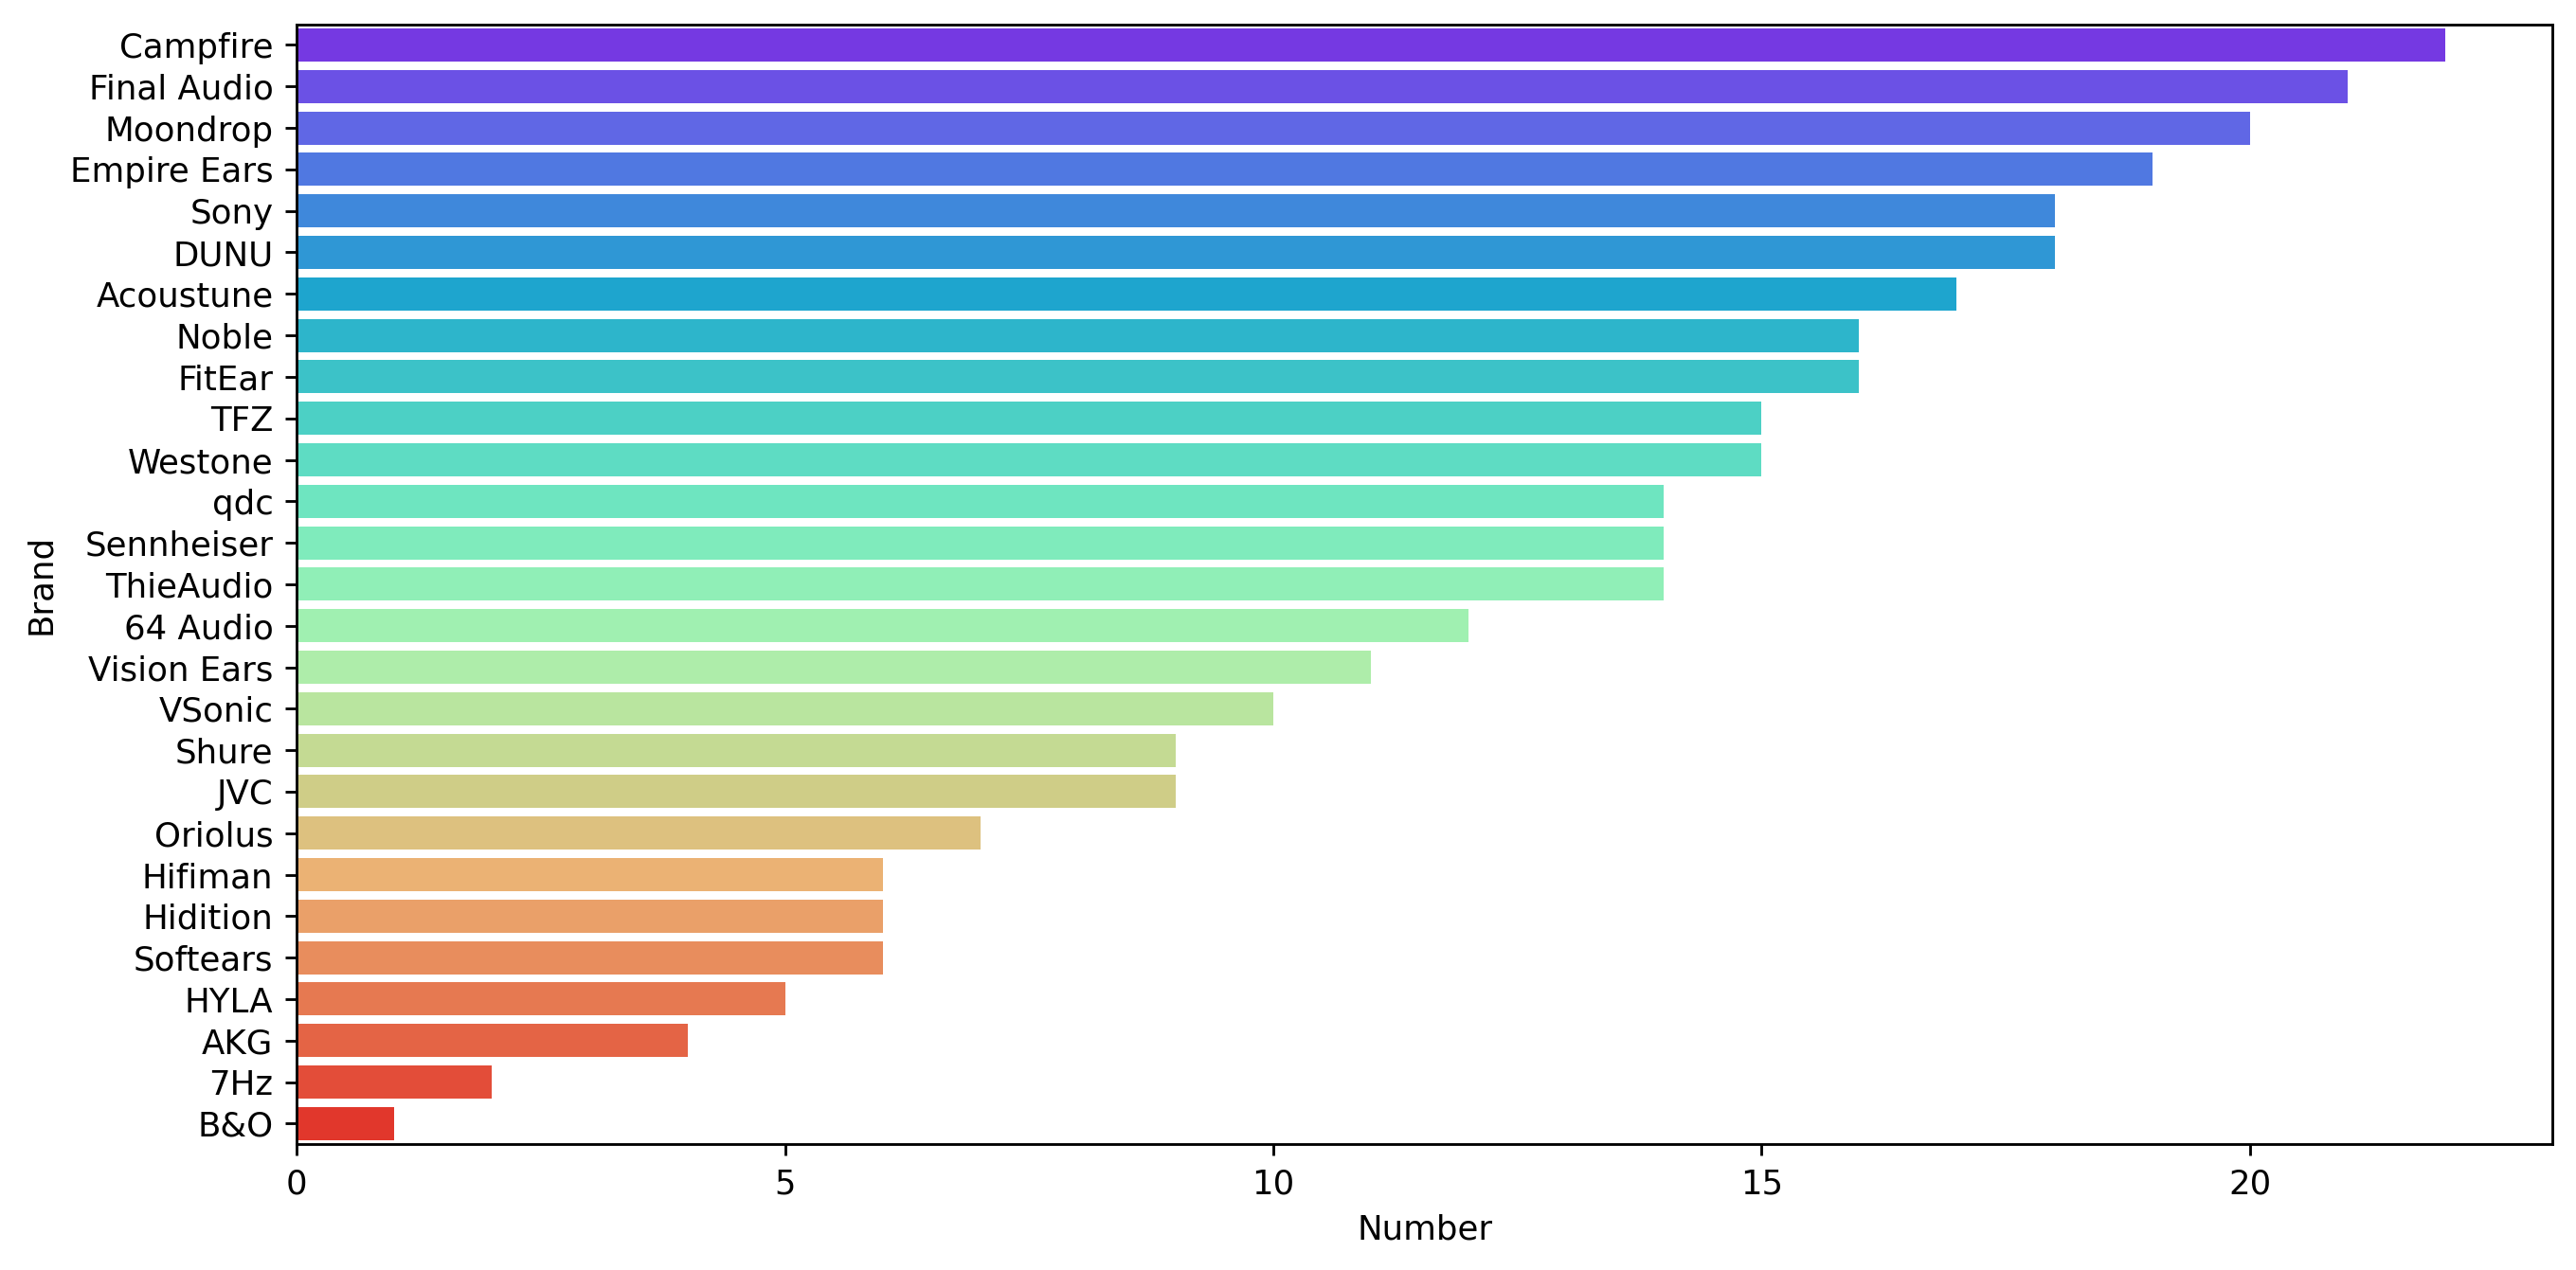

In [375]:
popular_destinations = data['Brand'].value_counts().head(27)

plt.figure(figsize=(12, 6),dpi=256)
sns.barplot(x=popular_destinations.values, y=popular_destinations.index, palette='rainbow')
plt.xlabel('Number')
plt.ylabel('Brand')
plt.show()

We can find that Campfire audio has the most products, followed by Final Audio,Moondrop,Empire Ears and so on.

## 3.4 Setup

#### What is Setup ?


Different Types of Headphone Drivers and Their Characteristics
Headphones utilize different types of driver units to produce sound. Here is a brief description of common headphone driver unit types and their characteristics:
1. Dynamic Driver (DD) Unit:

    Characteristics: Dynamic driver units are the most common and cost-effective headphone driver units. They typically offer high efficiency and good low-frequency response. They are suitable for various music genres, especially those emphasizing bass.

![image.gif](Images/DD.gif)

2. Balanced Armature (BA) Unit:
   
    Balanced armature units utilize multiple driver units (each responsible for a specific frequency range) to produce sound. They typically provide better separation, clarity, and audio detail, as well as good soundstage and imaging.

![image.gif](Images/BA.gif)

3. Electrostatic (EST) Unit:
 Electrostatic units use capacitors as the driving mechanism, with lightweight diaphragms and fast response characteristics. They typically offer clear and delicate high-frequency performance and excellent audio resolution.

4. Planar Magnetic (Planar) Unit:
 Planar magnetic units use an electromagnetic field as the driving force, with the diaphragm driven by a magnetic field generated by current passing through conductors. They typically provide a wide soundstage, high resolution, and a wide audio dynamic range.

### Rank for different Setup

Filters the Setup which ranking score is greater than 10 and sorts the Setup by the number.

In [376]:

pivot_table = pd.pivot_table(data, values='Rank', index=['DD', 'BA', 'EST', 'Planar'])
pivot_table_rankfirst = pivot_table.sort_values('Rank', ascending=False)
pivot_table_rankfirst = pivot_table[pivot_table['Rank'] >= 10]
pivot_table_rankfirst

Rank
DD BA EST Planar           
0  2  0   1       14.000000
   4  2   0       10.333333
      4   0       11.000000
   6  2   0       11.500000
   7  0   0       10.142857
   8  0   0       10.074074
      4   0       11.500000
   10 0   0       10.142857
      4   0       14.000000
   11 0   0       12.000000
   13 0   0       14.000000
   14 0   0       10.333333
   18 0   0       12.500000
1  1  2   0       10.166667
   2  2   0       11.833333
   3  1   0       12.000000
   4  2   0       11.363636
      4   0       10.500000
   5  2   0       13.000000
   6  2   0       14.000000
2  0  2   0       13.000000
   1  0   0       12.000000
   5  0   0       12.666667
      4   0       14.000000

### To see What setup is the best for earphones(Random Forest)

Using random forest algorithm, using data set training to analyze different setup of headset, predict which unit is best for headset sound

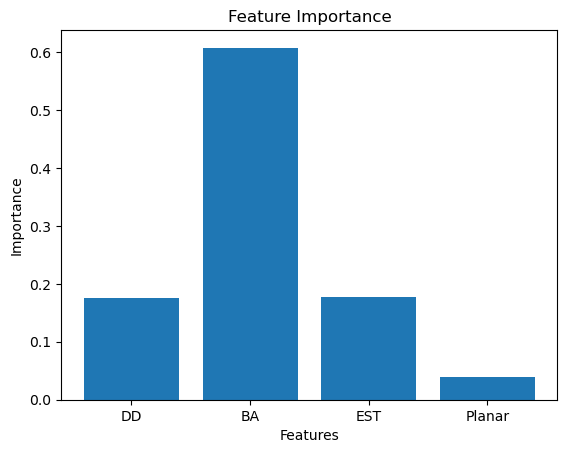

In [377]:
setup_data = data[["DD","BA","EST","Planar","Rank"]]

X = setup_data.drop('Rank', axis=1)
y = setup_data['Rank']

rf = RandomForestRegressor()
rf.fit(X, y)
feature_importance = rf.feature_importances_

plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

We can find  that the most importanct feature is Balanced Armature (BA) Unit, it has the biggest impact on the sound of earphoes.

### Use Setup parameters to predict Earphones Rank(Multiple Regression Analysis)

Use Multiple Regression Analysis algorithm  to establish the relationship model between the Setup parameters and the Rank value, and determine the influence of each internal parameter on the score value

In [378]:
setup_data = data[["DD","BA","EST","Planar","Rank"]]

x = setup_data.drop('Rank', axis=1)
y = setup_data['Rank']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
coefficients = model.coef_
new_data = pd.DataFrame({'DD': [1], 'BA': [10], 'EST': [1], 'Planar': [0]})
predicted_score = model.predict(new_data)
predicted_score


array([10.56197373])

After we have the this model, we can predict different setup is how to impact the the sound of earphones.

Support an earphone's setup is "1DD10BA1EST", this model would predcit the rank about 10.56

### Relationship between the number of units and the Rank of earphones

It can use a scatter plot to observe the number of units in relation to the headphone ranking.

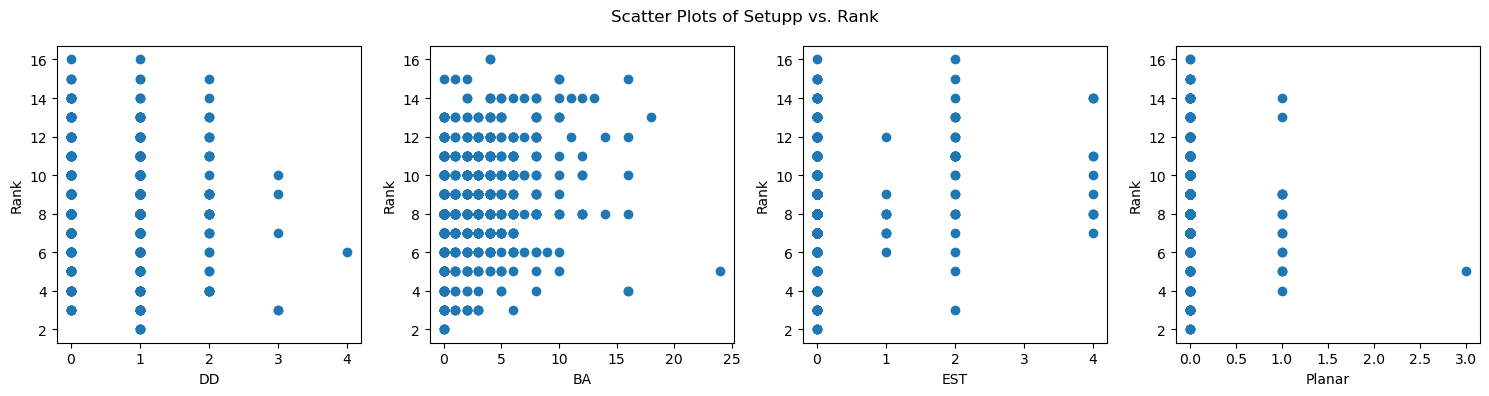

In [381]:
fig, axs = plt.subplots(1, len(X_train.columns), figsize=(15, 4))
for i, column in enumerate(X_train.columns):
    axs[i].scatter(X_train[column], y_train)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Rank')
plt.suptitle('Scatter Plots of Setupp vs. Rank')
plt.tight_layout()
plt.show()

We can find that use more "BA" units ,the sound of earhphone would better.but the "DD","EST","Planar" would not. 

# 4.Conclusion

In summary, we can draw the following conclusions: Balanced Armature (BA) units have a significant impact on the sound quality of earphones, with an increase in the number of BA units generally resulting in improved audio performance. However, this relationship does not hold true for other driver types such as Dynamic Driver (DD), Electrostatic (EST), or Planar drivers. The predictive model indicates that an earphone setup consisting of "1DD10BA1EST" would be ranked at approximately 10.56, demonstrating the model's ability to estimate sound quality for different setups. Among the analyzed brands, Campfire Audio has the highest number of products, followed by Final Audio, Moondrop, and Empire Ears, among others, indicating its prominent presence in the earphone market. V-shaped headphones represent the largest proportion (33%) of the total, followed by Warm and Neutral sound signatures, each accounting for approximately 15%. There is no strong correlation observed between headphone price and sound quality ranking, suggesting that factors beyond price contribute to audio performance. The majority of headphone prices fall within the range of 2000 yuan, indicating the primary consumer group's focus. In conclusion, these findings underscore the importance of Balanced Armature (BA) units in earphones, brand market presence, prevalent sound signatures, and the lack of a clear relationship between price and sound quality in the analyzed data.